# 21/02/23 Frida

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def conduction_1d( k, S, L, TA, TB, N):
    """
    PARAMETERS
    ----------
    L: float
    longitud del dom.
    
    k = float
    la conductividad del material 
    
     S = float
     fuente
     # la s en 0 lo vuelve lineal y difernte de 0 la vuelve exponencial
     
    TA = float
    frontera de la izq
    
    TB = float
    frontera de la derecha

                                          PARÁMETROS FÍSICOS

    N =  entero frozosamente
     número de nodos internos
     
     RETURN
     
    """
    h = L / (N + 1)

    T = np.zeros( N +2 )
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0]=2
    A[0,1]= -1
    for i in range (1 , N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1 ##AQUI TERMINA EL FOR
        
    A[-1,-2] = -1
    A [-1,-1] = 2
    
    T[1:N+1] = np.linalg.solve(A,b)
    
    plt.plot(T, 'o-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show

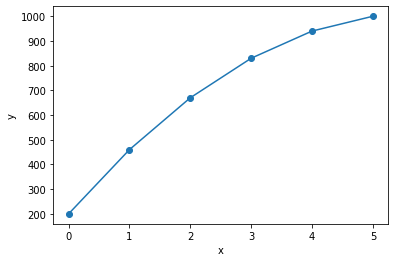

In [9]:
conduction_1d(0.02  , 1.0 , 5.0, 200, 1000, 4) #CON SHIFT + TABULADOR SALE LA DOCUMENTACIÓN

In [6]:
import ipywidgets as widgets
w = widgets.interactive(conduction_1d,
                        k = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max=1.0, min=0, value=0, step=0.2),
                        L = widgets.fixed(5.0),
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        N = widgets.IntSlider(max=10, min=4, value=4))

In [7]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…